# Multi-Class Classification with Perceptron

Lab Assignment from [AI for Beginners Curriculum](https://github.com/microsoft/ai-for-beginners).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

You can use the following perceptron training code from the lecture:

In [2]:
def train(positive_examples, negative_examples, num_iterations = 100):
    num_dims = positive_examples.shape[1]
    weights = np.zeros((num_dims,1)) # initialize weights
    
    pos_count = positive_examples.shape[0]
    neg_count = negative_examples.shape[0]
    
    report_frequency = 10
    
    for i in range(num_iterations):
        pos = random.choice(positive_examples)
        neg = random.choice(negative_examples)

        z = np.dot(pos, weights)   
        if z < 0:
            weights = weights + pos.reshape(weights.shape)

        z  = np.dot(neg, weights)
        if z >= 0:
            weights = weights - neg.reshape(weights.shape)
            
        if i % report_frequency == 0:             
            pos_out = np.dot(positive_examples, weights)
            neg_out = np.dot(negative_examples, weights)        
            pos_correct = (pos_out >= 0).sum() / float(pos_count)
            neg_correct = (neg_out < 0).sum() / float(neg_count)
            print("Iteration={}, pos correct={}, neg correct={}".format(i,pos_correct,neg_correct))

    return weights

In [3]:
def accuracy(weights, test_x, test_labels):
    res = np.dot(np.c_[test_x,np.ones(len(test_x))],weights)
    return (res.reshape(test_labels.shape)*test_labels>=0).sum()/float(len(test_labels))

# accuracy(wts, test_x, test_labels)

### Reading the Dataset

This code download the dataset from the repository on the internet. You can also manually copy the dataset from `/data` directory of AI Curriculum repo.

In [4]:
!rm *.pkl
!wget https://github.com/microsoft/AI-For-Beginners/raw/c639951043c67fe7862f5c236d1e4f0cdf68202c/data/mnist.pkl.gz
!gzip -d mnist.pkl.gz

--2024-11-08 07:56:18--  https://github.com/microsoft/AI-For-Beginners/raw/c639951043c67fe7862f5c236d1e4f0cdf68202c/data/mnist.pkl.gz
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/microsoft/AI-For-Beginners/c639951043c67fe7862f5c236d1e4f0cdf68202c/data/mnist.pkl.gz [following]
--2024-11-08 07:56:18--  https://raw.githubusercontent.com/microsoft/AI-For-Beginners/c639951043c67fe7862f5c236d1e4f0cdf68202c/data/mnist.pkl.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10392609 (9.9M) [application/octet-stream]
Saving to: ‘mnist.pkl.gz’

mnist.pkl.gz        100%[===================>]   9.91M 

In [5]:
with open('mnist.pkl', 'rb') as mnist_pickle:
    MNIST = pickle.load(mnist_pickle)

[  0   0 188 255  94   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0 191 250 253  93   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
1


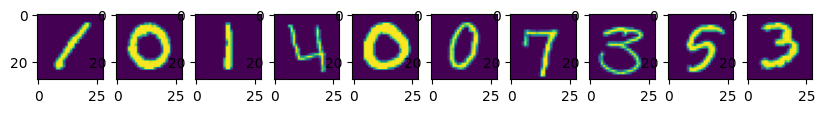

In [6]:
print(MNIST['Train']['Features'][0][130:180])
print(MNIST['Train']['Labels'][0])
features = MNIST['Train']['Features'].astype(np.float32) / 256.0
labels = MNIST['Train']['Labels']
fig = plt.figure(figsize=(10,5))
for i in range(10):
    ax = fig.add_subplot(1,10,i+1)
    plt.imshow(features[i].reshape(28,28))
plt.show()

Code to create *one-vs-other* dataset for two-digit classification. You need to modify this code to create *one-vs-all* dateset.

In [7]:
def set_mnist_pos_neg(positive_label, negative_label):
    positive_indices = [i for i, j in enumerate(MNIST['Train']['Labels']) 
                          if j == positive_label]
    negative_indices = [i for i, j in enumerate(MNIST['Train']['Labels']) 
                          if j == negative_label]

    positive_images = MNIST['Train']['Features'][positive_indices]
    negative_images = MNIST['Train']['Features'][negative_indices]

    return positive_images, negative_images

In [8]:
def set_mnist_pos_neg_one_all(positive_label, negative_labels):
    positive_indices = [i for i, j in enumerate(MNIST['Train']['Labels']) 
                          if j == positive_label]
    negative_indices = [i for i, j in enumerate(MNIST['Train']['Labels']) 
                          if j in negative_labels]

    positive_images = MNIST['Train']['Features'][positive_indices]
    negative_images = MNIST['Train']['Features'][negative_indices]

    return positive_images, negative_images

In [ ]:
MNIST['Train']['Labels'][0],

In [9]:
positive_images_0, negative_images_0 = set_mnist_pos_neg_one_all(0, [1,2,3,4,5,6,7,8,9])
positive_images_1, negative_images_1 = set_mnist_pos_neg_one_all(1, [0,2,3,4,5,6,7,8,9])
positive_images_2, negative_images_2 = set_mnist_pos_neg_one_all(2, [0,1,3,4,5,6,7,8,9])
positive_images_3, negative_images_3 = set_mnist_pos_neg_one_all(3, [0,1,2,4,5,6,7,8,9])
positive_images_4, negative_images_4 = set_mnist_pos_neg_one_all(4, [0,1,2,3,5,6,7,8,9])
positive_images_5, negative_images_5 = set_mnist_pos_neg_one_all(5, [0,1,2,3,4,6,7,8,9])
positive_images_6, negative_images_6 = set_mnist_pos_neg_one_all(6, [0,1,2,3,4,5,7,8,9])
positive_images_7, negative_images_7 = set_mnist_pos_neg_one_all(7, [0,1,2,3,4,5,6,8,9])
positive_images_8, negative_images_8 = set_mnist_pos_neg_one_all(8, [0,1,2,3,4,5,6,7,9])
positive_images_9, negative_images_9 = set_mnist_pos_neg_one_all(9, [0,1,2,3,4,5,6,7,8])


In [10]:
# trainings
import random
wts_0 = train(positive_images_0, negative_images_0, num_iterations = 100)
wts_1 = train(positive_images_1, negative_images_1, num_iterations = 100)
wts_2 = train(positive_images_2, negative_images_2, num_iterations = 100)
wts_3 = train(positive_images_3, negative_images_3, num_iterations = 100)
wts_4 = train(positive_images_4, negative_images_4, num_iterations = 100)
wts_5 = train(positive_images_5, negative_images_5, num_iterations = 100)
wts_6 = train(positive_images_6, negative_images_6, num_iterations = 100)
wts_7 = train(positive_images_7, negative_images_7, num_iterations = 100)
wts_8 = train(positive_images_8, negative_images_8, num_iterations = 100)
wts_9 = train(positive_images_9, negative_images_9, num_iterations = 100)

Iteration=0, pos correct=0.0, neg correct=1.0
Iteration=10, pos correct=0.8843175217812197, neg correct=0.8078588782085138
Iteration=20, pos correct=0.319215876089061, neg correct=0.9842611175662829
Iteration=30, pos correct=0.9586156824782188, neg correct=0.7910901024611809
Iteration=40, pos correct=0.920619554695063, neg correct=0.9099767613816415
Iteration=50, pos correct=0.9636979670861568, neg correct=0.8588518009929228
Iteration=60, pos correct=0.8264762826718296, neg correct=0.9708196894475547
Iteration=70, pos correct=0.9467570183930301, neg correct=0.9054874828351115
Iteration=80, pos correct=0.9808809293320426, neg correct=0.8544945600507025
Iteration=90, pos correct=0.9704743465634076, neg correct=0.8983310446815252
Iteration=0, pos correct=0.0, neg correct=1.0
Iteration=10, pos correct=0.6778394534585824, neg correct=0.9952031300246543
Iteration=20, pos correct=0.9955166524338173, neg correct=0.6569568013720656
Iteration=30, pos correct=0.990392826643894, neg correct=0.8908

Now you need to:
1. Create 10 *one-vs-all* datasets for all digits
1. Train 10 perceptrons
1. Define `classify` function to perform digit classification
1. Measure the accuracy of classification and print *confusion matrix*
1. [Optional] Create improved `classify` function that performs the classification using one matrix multiplication.

In [11]:
def classify(feature, wts_list):
    scores = [np.dot(feature, wts) for wts in wts_list]
    return scores.index(max(scores))

In [13]:
test_features = MNIST['Train']['Features']
test_labels = MNIST['Train']['Labels']



In [14]:
classify(test_features[0], [wts_0, wts_1, wts_2, wts_3, wts_4, wts_5, wts_6, wts_7, wts_8, wts_9])

1

In [15]:
# accuracy
correct = 0
total = len(test_features)
for i in range(len(test_features)):
    if classify(test_features[i], [wts_0, wts_1, wts_2, wts_3, wts_4, wts_5, wts_6, wts_7, wts_8, wts_9]) == test_labels[i]:
        correct += 1
print(correct/total)

0.7136666666666667
